# Lab 3a: Graphs I

Lab associated with Module 3a: Graphs I

***

In [1]:
# The following lines are used to increase the width of cells to utilize more space on the screen 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

***

### Section 0: Imports

In [2]:
import numpy as np

Details of Digraph package: https://h1ros.github.io/posts/introduction-to-graphviz-in-jupyter-notebook/

***

In [3]:
# # conda remove graphviz
# conda install python-graphviz
# graphviz.Source(dot_graph).view()


In [3]:
# pip install graphviz

from IPython.display import Image
from graphviz import Digraph


### Section 1: Coming up with a way to visualize the graph data and encode data in the graph

Let us come up with some example to work on

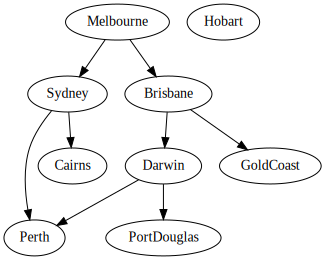

In [4]:
dot = Digraph()

dot.edge('Melbourne', 'Sydney')
dot.edge('Melbourne', 'Brisbane')
dot.edge('Sydney', 'Perth')
dot.edge('Sydney', 'Cairns')
dot.edge('Brisbane', 'Darwin')
dot.edge('Brisbane', 'GoldCoast')
dot.edge('Darwin', 'Perth')
dot.edge('Darwin', 'PortDouglas')
dot.node('Hobart')

dot



This is pretty cool display, but we need to encode this information in a graph, let us try to do that in the following:

In [5]:
class Node:
    
    def __init__(self, v):

        self.value = v
        self.inNeighbors = []
        self.outNeighbors = []
        self.status = "unvisited"
        self.colour = ""                # QUESTION: CAN THESE BE "None"?
        self.level = 0                  # QUESTION: CAN THESE BE "None"?
        
    def hasOutNeighbor(self, v):        
        if v in self.outNeighbors:
            return True
        return False
        
    def hasInNeighbor(self, v):
        if v in self.inNeighbors:
            return True
        return False
    
    def hasNeighbor(self, v):
        if v in self.inNeighbors or v in self.outNeighbors:
            return True
        return False
    
    def getOutNeighbors(self):
        return self.outNeighbors
    
    def getInNeighbors(self):
        return self.inNeighbors
        
    def addOutNeighbor(self, v):
        self.outNeighbors.append(v)
    
    def addInNeighbor(self, v):
        self.inNeighbors.append(v)
    
    def __str__(self):
        return str(self.value) 

In [6]:
class Graph:    
    def __init__(self):
        
        self.vertices = []

    def addVertex(self,n):
        
        self.vertices.append(n)
        
    # add a directed edge from CS161Node u to CS161Node v
    def addDiEdge(self, u, v):
        
        u.addOutNeighbor(v)
        v.addInNeighbor(u)
        
    # add edges in both directions between u and v
    def addBiEdge(self, u, v):
        
        self.addDiEdge(u, v)
        self.addDiEdge(v, u)
        
    # get a list of all the directed edges
    # directed edges are a list of two vertices
    def getDirEdges(self):
        
        ret = []
        for v in self.vertices:
            ret += [ [v, u] for u in v.outNeighbors ]
        return ret
    
    def __str__(self):
        ret = "Graph with:\n"
        ret += "\t Vertices:\n\t"
        for v in self.vertices:
            ret += str(v) + ","
        ret += "\n"
        ret += "\t Edges:\n\t"
        for a,b in self.getDirEdges():
            ret += "(" + str(a) + "," + str(b) + ") "
        ret += "\n"
        return ret






In [7]:
G = Graph()
for i in range(10):
    G.addVertex( Node(i) )

In [8]:
V = G.vertices
for i in range(9):
    G.addDiEdge( V[i], V[i+1] )

In [9]:
print(G)

Graph with:
	 Vertices:
	0,1,2,3,4,5,6,7,8,9,
	 Edges:
	(0,1) (1,2) (2,3) (3,4) (4,5) (5,6) (6,7) (7,8) (8,9) 



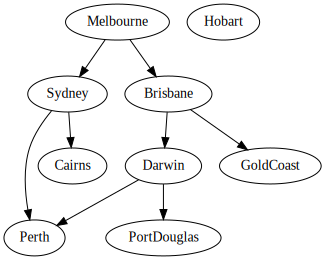

In [10]:
# create a Digraph to visualise
dot = Digraph()

dot.edge('Melbourne', 'Sydney')
dot.edge('Melbourne', 'Brisbane')
dot.edge('Sydney', 'Perth')
dot.edge('Sydney', 'Cairns')
dot.edge('Brisbane', 'Darwin')
dot.edge('Brisbane', 'GoldCoast')
dot.edge('Darwin', 'Perth')
dot.edge('Darwin', 'PortDouglas')
dot.node('Hobart')

dot.view()
dot

Okay, now that our implementation is working fine, let us try to plug-in our data

In [11]:
G = Graph()
for i in ['Melbourne', 'Sydney', 'Brisbane', 'Perth', 'Darwin', 'GoldCoast', 'PortDouglas', 'Cairns']:
    G.addVertex( Node(i) )

In [12]:
V = G.vertices

In [13]:
for i in range(len(V)):
    print(i, V[i].value)

0 Melbourne
1 Sydney
2 Brisbane
3 Perth
4 Darwin
5 GoldCoast
6 PortDouglas
7 Cairns


In [14]:
#dot.edge('Melbourne', 'Sydney')
G.addDiEdge( V[0], V[1] )

#dot.edge('Melbourne', 'Brisbane')
G.addDiEdge( V[0], V[2] )

#dot.edge('Sydney', 'Perth')
G.addDiEdge( V[1], V[3] )

#dot.edge('Sydney', 'Cairns')
G.addDiEdge( V[1], V[7] )

#dot.edge('Brisbane', 'Darwin')
G.addDiEdge( V[2], V[4] )

#dot.edge('Brisbane', 'GoldCoast')
G.addDiEdge( V[2], V[5] )

#dot.edge('Darwin', 'Perth')
G.addDiEdge( V[4], V[3] )

#dot.edge('Darwin', 'PortDouglas')
G.addDiEdge( V[4], V[6] )

Graph with:
	 Vertices:
	Melbourne,Sydney,Brisbane,Perth,Darwin,GoldCoast,PortDouglas,Cairns,
	 Edges:
	(Melbourne,Sydney) (Melbourne,Brisbane) (Sydney,Perth) (Sydney,Cairns) (Brisbane,Darwin) (Brisbane,GoldCoast) (Darwin,Perth) (Darwin,PortDouglas) 



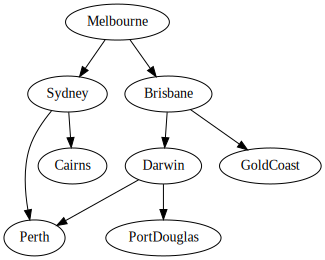

In [15]:
'''
Added method to visualse graph as Digraph()
'''
print(G)

def visualiseGraph(graph):
  GDot = Digraph()
  for i in range(len(V)):
    GDot.node(V[i].value) 

  for a,b in graph.getDirEdges():
    GDot.edge(a.value, b.value)
  return GDot

visualiseGraph(G)





Sounds beautiful, now we have the data in graph format. Let us see if you we can start coding our clever algorithms.

***

### Section 2: Doing a simple DFS

In [16]:
def DFS(root):
    
    if root == Null:
        return

    root.visited = True

    for n in root.neighbours:
        if n.visited == False:
            DFS(n)

In [17]:
# DFS PreOrder
def DFS_PreOrder_helper(w):
    
    w.status = "done"
    print(w)
    
    for v in w.getOutNeighbors(): # go through every edge coming from the node
        if v.status == "unvisited":  #  add the node           
            DFS_PreOrder_helper(v) # check the node's neighbour's and then counr it
    

# DFS PostOrder
def DFS_PostOrder_helper(w):
    
    w.status = "inprogress"    
    for v in w.getOutNeighbors(): # go through every edge coming from the node
        if v.status == "unvisited":  #  check the neighbour of the node          
            DFS_PostOrder_helper(v) # check the neighbour's neighbour    
    print(w)  # this prints the last node, then sequentially 
              # through all other neighbours
              # then it returns to the next level up 
    w.status = "done"


# DFS InOrder
'''
This does not work!
Could not figure out how to code this
'''
# InOrder DFS:
# go to lowest left node and add to list
# then add it's parent to the list
# then any children of that parent
# repeat ...


def DFS_InOrder_helper(w): 
    w.status = "inprogress"     
    w.status = "inprogress"    
    for v in w.getOutNeighbors(): 
        if v.status != "inprogress":            
            DFS_InOrder_helper(v) # check the neighbour's neighbour    
    print(w) 
    w.status = "done"


'''
1 = PreOrder
2 = InOrder
3 = PostOrder
'''
        
def DFS(w, G, order):
  for v in G.vertices: # array of all nodes        
    v.status = "unvisited"  # set all nodes unvisited      
  if order == 1:
    print()
    print("PreOrder:") #1
    return DFS_PreOrder_helper(w)
  elif order == 2:
    print()
    print("InOrder:") #2
    return DFS_InOrder_helper(w)
  else:
    print()
    print("PostOrder:") #3
    return DFS_PostOrder_helper(w)


In [18]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://assets.leetcode.com/users/andvary/image_1556551007.png",width=700, height=400)



PreOrder:
Melbourne
Sydney
Perth
Cairns
Brisbane
Darwin
PortDouglas
GoldCoast

PostOrder:
Perth
Cairns
Sydney
PortDouglas
Darwin
GoldCoast
Brisbane
Melbourne

InOrder does not work in tis current state: 

InOrder:
Perth
Cairns
Sydney
Perth
PortDouglas
Darwin
GoldCoast
Brisbane
Melbourne

Graph with:
	 Vertices:
	Melbourne,Sydney,Brisbane,Perth,Darwin,GoldCoast,PortDouglas,Cairns,
	 Edges:
	(Melbourne,Sydney) (Melbourne,Brisbane) (Sydney,Perth) (Sydney,Cairns) (Brisbane,Darwin) (Brisbane,GoldCoast) (Darwin,Perth) (Darwin,PortDouglas) 




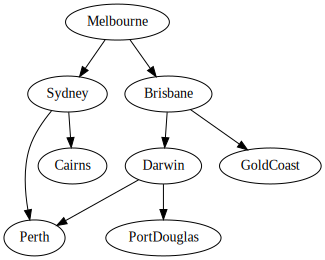

In [22]:
# from traitlets.utils.text import indent
'''
TODO: measure time with progresses
'''

# Edges are outNeighbours and inNeighbours

# Let us do the DFS from Melbourne
w = G.vertices[0] # first node 

'''
1 = PreOrder
2 = InOrder
3 = PostOrder
'''

DFS(w, G, 1) # PreOrder
DFS(w, G, 3) # PostOrder

print("\nInOrder does not work in tis current state: ")
DFS(w, G, 2) # PostOrder


print()
print(G)
print()
visualiseGraph(G)




### <font color='red'> Activity 1 - Code Reflections. </font>

In [21]:

'''
Ammended DFS helpers to use Pre- and Post-Order Traversal
Attempted InOrder but could not get it to work properly.
  The algorithm should print the first neighbour, then the root,
  then the second neighbour.
Added visualise graph function to make a DiGraph visualisation of the graph
based on the vertices and edges stored in the Graph
'''



'\nAmmended DFS helpers to use Pre- and Post-Order Traversal\nAttempted InOrder but could not get it to work properly.\n  The algorithm should print the first neighbour, then the root,\n  then the second neighbour.\nAdded visualise graph function to make a DiGraph visualisation of the graph\nbased on the vertices and edges stored in the Graph\n'

(1) Have a look at the associated ipython notebook and run the code for DFS. Demonstrate your understanding of the code by (doing some of the following activities):
Running the code with many different test-cases.
Alter the code and obtain some desired functionality.
Find errors in the code, or
Expand the code (You can do in-order, post-order and pre-order traversal).

***

### Section 4: Breadth First Search (BFS)

Now let us see if we can do BFS on the graph

In [23]:
def BFS(root):

    visited = [False] * (num_nodes_in_graph) 

    # Create a queue for BFS
    queue = []

    queue.append(root)
    visited[root] = True

    while queue:

        r = queue.pop(0)
        print(r)

        for n in r.adjacent:
            
            if visited[n] == False:
                
                visited[n] = True
                queue.append(n)
                    

In [25]:
def BFS(w, G, biPartiteCheck = 0):
    
    for v in G.vertices:
        v.status = "unvisited" # mark all nodes unvisited
        
    n = len(G.vertices)
    isBipartite = 0 # initialise assuming the graph is not Bipartite
    
    Ls = [ [] for i in range(n) ] # list of nodes
    Ls[0] = [w] # first node in list is the beginning node
    w.status = "visited"
    w.colour = "red"
    w.level = 0
    
    for i in range(n): # repeat as many times are there are vertices 
      for u in Ls[i]: # for every element in the list
        # print("\n Node: ",u)      ### This prints the element, but doesnt add to list properly     
        # print("node colour: ",u.colour)
        # print("node level :",u.level)
        for v in u.getOutNeighbors():  # for every out neighbour (all children on that level)           
          if v.status == "unvisited": # check if it has been visited (skip if it has)
            v.level = u.level + 1
            v.status = "visited"
            # TODO: change this to a ternery operator to clean up code (REFACTOR?)
            if u.colour == "blue":
              v.colour = "red"
            else:
              v.colour = "blue"

          Ls[i + 1].append(v) #append this neighbour to the list
    
    # moved this to make sure it is printing the value in the list, and not just printing it before it is added to the list
    print("values of nodes in  list: ")
    for i in range(n):
      for u in Ls[i]:
          print(u.value)
    
    if biPartiteCheck:
      for i in range(n):
        for u in Ls[i]:
          print()
          print("\n Node: ",u)      ### This prints the element, but doesnt add to list properly     
          print("node colour: ",u.colour)
          print("node level :",u.level)
        if (u.level % 2) == 0 and ((u.level - 1) % 2) == 1:
          isBipartite = 1
    
    if isBipartite:
      print("\nGraph is Bipartite")  
          


  






In [26]:
# Let us do the BFS from Melbourne
w = G.vertices[0]

BFS(w, G)

print()
print(G)
print()


values of nodes in  list: 
Melbourne
Sydney
Brisbane
Perth
Cairns
Darwin
GoldCoast
Perth
PortDouglas

Graph with:
	 Vertices:
	Melbourne,Sydney,Brisbane,Perth,Darwin,GoldCoast,PortDouglas,Cairns,
	 Edges:
	(Melbourne,Sydney) (Melbourne,Brisbane) (Sydney,Perth) (Sydney,Cairns) (Brisbane,Darwin) (Brisbane,GoldCoast) (Darwin,Perth) (Darwin,PortDouglas) 




### Step through example of the variables and list population from the algorithm:


---


n = 8

Ls = [[Mel], [], [], [], [], [], [], []]


---


i = 1

u = [Mel]

v = 2 (Syd + Bne)

Ls = [ [Mel], [Syd], [Bne], [ ], [ ], [ ], [ ], [ ] ]


---


i = 2

u = [Syd]

v = 2 (Perth + Cairns)

Ls = [ [Mel], [Syd], [Bne], [Perth], [Cairns], [ ], [ ], [] ]


---



i = 3

u = [Bne]

v = 2 (Darwin + GC)

Ls = [ [Mel], [Syd], [Bne], [Perth], [Cairns], [Darwin], [GC], [ ] ]


---



i = 4

u = [Perth]

v = 0



---


i = 5

u = [Cairns]

v = 0



---


i = 6

u = [Darwin]

v = 2 (Perth + Port D) # perth is visited, so skip

Ls = [[Mel], [Syd], [Bne], [Perth], [Cairns], [Darwin], [GC], [Port D]]


---


i = 7

u = [GC]

v = 0

Ls = [[Mel], [Syd], [Bne], [Perth], [Cairns], [Darwin], [GC], [Port D]]


---


i = 8

u = [Port D]

v = 0

Ls = [[Mel], [Syd], [Bne], [Perth], [Cairns], [Darwin], [GC], [Port D]] # this is the correct order



---








***

### <font color='red'> Activity 2 - Code Reflections. </font>

In [27]:
'''
Stepped through the BFS code, and listed the variables and how the list is populated as an exmaple
'''

'\nStepped through the BFS code, and listed the variables and how the list is populated as an exmaple\n'

(2) Have a look at the associated ipython notebook and run the code for BFS. Demonstrate your understanding of the code by (doing some of the following activities):
Running the code with many different test-cases.
Alter the code and obtain some desired functionality.
Find errors in the code, or
Expand the code.


### <font color='red'> Activity 3: Bidirectional search is used to find the shortest path between a source and a destination. It operates by essentially running two simultaneous breadth-first searches one from each node. When their searches collide, we have a match. Design an algorithm for bi-directional search, and then code it in this week's ipynb. </font>

In [33]:
'''

My thoughts for this were to conduct a forward BFS checking for out-nodes.
Then a backwards BFS checking for in-nodes.
Both of these worked, but finding the intersecting proved difficult, 
despite spending way too much time on it.

Ideally though, it would step through a forwards and a backwards, interchanging
until a mutual node was found.
This would result in reduced runtime also, without having to traverse farther
than is required.

'''

def is_intersection(source, destination, source_Ls, dest_Ls): #-1 if not present 
  n = len(G.vertices)  #make n length of the new lists
  s_n = len(source_Ls)
  d_n = len(dest_Ls)
  maxPathLength = max(s_n,d_n)
  shortest_Path = [ [] for i in range(maxPathLength) ]
  print("shortest path initialising: ",shortest_Path)



  # ----------------------------------------------------------------------
  # step 1: check the source and destination exist in each list
  # ----------------------------------------------------------------------

  print("\ndestination is in source list: ")
  for i in range(s_n):
    for u in source_Ls[i]: # BDGPePp
      if u == destination: #if node is the destionation node
        print(u) # print the destination from within the source list
        d_in_source_Ls = i
  # print(d_in_source_Ls) # not sure what the number means 

  print("\nsource is in destination list: ")
  for i in range(d_n):
    for u in dest_Ls[i]: #PSDMB
      if u == source: #if node is the destionation node
        print(u) # print the destination from within the source list
        s_in_dest_Ls = i
  # print(s_in_dest_Ls) # not sure what the number means 



  # ----------------------------------------------------------------------
  # step 2: check what other nodes exist in each list
  # ----------------------------------------------------------------------

  for i in range(maxPathLength):
    for j in range(maxPathLength):
      for k in source_Ls[j]: # j is a node
        print("k: ",k) # j is every node in the source_Ls
        new_node = dest_Ls[j]
        print("dest_Ls[i].1: ",new_node[0])

        if k == new_node[0]: # and source_Ls[i] != source:
        # dest_Ls[j] == source_Ls[i] and source_Ls[i] != source:
          intersectingNode = k
          print("\n *****intersecting node: \n *****", intersectingNode)





''' OUTPUT:
j:  Brisbane
dest_Ls[i].1:  Perth
j:  Darwin
dest_Ls[i].1:  Sydney
j:  GoldCoast
dest_Ls[i].1:  Sydney
j:  Perth
dest_Ls[i].1:  Melbourne
j:  PortDouglas
dest_Ls[i].1:  Melbourne

'''
 
'''
source_Ls:
  Brisbane    
  Darwin         
  GoldCoast
  Perth
  PortDouglas
dest_Ls:
  Perth       
  Sydney      
  Darwin      
  Melbourne   
  Brisbane    
'''


  # for i in range(maxPathLength):
  #   for k in range(maxPathLength)
  #     for j in source_Ls[i]: # j is a node
  #       print("j: ",j) # j is every node in the source_Ls
  #       new_node = dest_Ls[i]
  #       print("dest_Ls[i].1: ",new_node[0])

  #       if j == new_node[0]: # and source_Ls[i] != source:
  #       # dest_Ls[j] == source_Ls[i] and source_Ls[i] != source:
  #         intersectingNode = j
  #         print("intersecting node: ", intersectingNode)
  
  # ----------------------------------------------------------------------
  # step 3: print the order of the nodes, starting at source
  # ----------------------------------------------------------------------

  # for v in u.getOutNeighbors():  # for every out neighbour (all children on that level)           
  #   if v.status == "unvisited": # check if it has been visited (skip if it has)
  #     v.status = "visited"
  #     source_Ls[i + 1].append(v) #append this neighbour to the list

  # for v in G.vertices:
  #   if G.vertices[v].value == s.value:
  #     s_in_dest_Ls = v


  # print("\nfrom inter: values of nodes in dest_Ls list: ")
  # for i in range(d_n):
  #   for u in dest_Ls[i]:
  #     print(u.value)
  # print("\nfrom inter: values of nodes in source_Ls list: ")
  # for i in range(s_n):
  #   for u in source_Ls[i]:
  #     print(u.value)  


'\nsource_Ls:\n  Brisbane    \n  Darwin         \n  GoldCoast\n  Perth\n  PortDouglas\ndest_Ls:\n  Perth       \n  Sydney      \n  Darwin      \n  Melbourne   \n  Brisbane    \n'

In [34]:
def BFS_Helper(w, G, source_Ls, dest_Ls, direction = 'forward'):
  # # create lists
  n = len(G.vertices)

  for v in G.vertices:
    v.status = "unvisited" # mark all nodes unvisited           

  if direction == 'forward': 
    # Forward BFS from starting node  
    print()
    print("source_Ls:")  
    source_Ls[0] = [w] # first node is starting node
    w.status = "visited"

    for i in range(n): # number of vertices (nodes)
      for u in source_Ls[i]: # for every element in the list
        for v in u.getOutNeighbors():  # for every out neighbour (all children on that level)           
          if v.status == "unvisited": # check if it has been visited (skip if it has)
            v.status = "visited"
            source_Ls[i + 1].append(v) #append this neighbour to the list

    print("values of nodes in source_Ls list: ")
    for i in range(n):
      for u in source_Ls[i]:
        print(u.value)

  else:
    # Backward BFS from ending node
    print() 
    print("dest_Ls:")
    dest_Ls[0] = [w] # last node is starting node (Perth)
    w.status = "visited"  

    for i in range(n): # number of vertices (nodes) #maybe can make this smaller to same memory space
      for u in dest_Ls[i]: # for every element in the list
        for v in u.getInNeighbors():  # for every out neighbour (all children on that level)           
          if v.status == "unvisited": # check if it has been visited (skip if it has)
            v.status = "visited"
            dest_Ls[i + 1].append(v) #append this neighbour to the list 

    # moved this to make sure it is printing the value in the list, and not just printing it before it is added to the list
    print("values of nodes in dest_Ls list: ")
    for i in range(n):
      for u in dest_Ls[i]:
        print(u.value)


  

In [35]:
def Bi_Direction_Search(source, destination, G): #source, destination, Graph

  # create lists
  n = len(G.vertices)
  source_Ls = [ [] for i in range(n) ] 
  dest_Ls = [ [] for i in range(n) ] 

  # dont ever complete the searches, but do a step incrementally until an intersection node is found
  # choose smaller queue where possible

  # forward search
  BFS_Helper(source, G, source_Ls, dest_Ls, 'forward')  
  # # backward search
  BFS_Helper(destination,G, source_Ls, dest_Ls, 'backward')
  
  # # check for intersection node
  is_intersection(source, destination, source_Ls, dest_Ls)




source_Ls:
values of nodes in source_Ls list: 
Brisbane
Darwin
GoldCoast
Perth
PortDouglas

dest_Ls:
values of nodes in dest_Ls list: 
Perth
Sydney
Darwin
Melbourne
Brisbane
shortest path initialising:  [[], [], [], [], [], [], [], []]

destination is in source list: 
Perth

source is in destination list: 
Brisbane
k:  Brisbane
dest_Ls[i].1:  Perth
k:  Darwin
dest_Ls[i].1:  Sydney
k:  GoldCoast
dest_Ls[i].1:  Sydney
k:  Perth
dest_Ls[i].1:  Melbourne
k:  PortDouglas
dest_Ls[i].1:  Melbourne
k:  Brisbane
dest_Ls[i].1:  Perth
k:  Darwin
dest_Ls[i].1:  Sydney
k:  GoldCoast
dest_Ls[i].1:  Sydney
k:  Perth
dest_Ls[i].1:  Melbourne
k:  PortDouglas
dest_Ls[i].1:  Melbourne
k:  Brisbane
dest_Ls[i].1:  Perth
k:  Darwin
dest_Ls[i].1:  Sydney
k:  GoldCoast
dest_Ls[i].1:  Sydney
k:  Perth
dest_Ls[i].1:  Melbourne
k:  PortDouglas
dest_Ls[i].1:  Melbourne
k:  Brisbane
dest_Ls[i].1:  Perth
k:  Darwin
dest_Ls[i].1:  Sydney
k:  GoldCoast
dest_Ls[i].1:  Sydney
k:  Perth
dest_Ls[i].1:  Melbourne
k:  Por

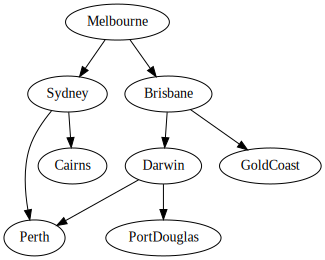

In [36]:
#driver code

source = G.vertices[2] #Brisbane
destination = G.vertices[3] #Perth
Bi_Direction_Search(source, destination, G)

# Vertices:	Melbourne,Sydney,Brisbane,Perth,Darwin,GoldCoast,PortDouglas,Cairns,

print()
print(G)
print()
visualiseGraph(G)


(3) Bidirectional search is used to find the shortest path between a source and a destination. It operates by essentially running two simultaneous breadth-first searches one from each node. When their searches collide, we have a match. Design an algorithm for bi-directional search, and then code it in this week's ipynb.

***

### <font color='red'> Activity 4: Design an algorithm using BFS to determine if a graph is bi-partite. Modify the BFS code in this week's lab book, and implement your designed algorithm. </font>

In [37]:
# every node can be coloured blue or red;
# and every neighbour is the opposite colour

# ammended node class to have a level and a colour
# ammended BFS to check if it is bipartite and print additional information
# as well as bipartite confirmation

# BFS(w,G) is normal BFS

# add 1 as parameter to do bipartite check
BFS(w, G,1)








values of nodes in  list: 
Melbourne
Sydney
Brisbane
Perth
Cairns
Darwin
GoldCoast
Perth
PortDouglas


 Node:  Melbourne
node colour:  red
node level : 0


 Node:  Sydney
node colour:  blue
node level : 1


 Node:  Brisbane
node colour:  blue
node level : 1


 Node:  Perth
node colour:  red
node level : 2


 Node:  Cairns
node colour:  red
node level : 2


 Node:  Darwin
node colour:  red
node level : 2


 Node:  GoldCoast
node colour:  red
node level : 2


 Node:  Perth
node colour:  red
node level : 2


 Node:  PortDouglas
node colour:  blue
node level : 3

Graph is Bipartite


(4) Design an algorithm using BFS to determine if a graph is bi-partite. Modify the BFS code in this week's lab book, and implement your designed algorithm.

***

### Section 7: Developing Algorithm for Strongly Connected Components

We will have to modify our DFS to incorporate the in and out time. We will have to modify our graph as well

Let us start by adding inTime and outTime in the Node first

In [78]:
class Node:
    
    def __init__(self, v):

        self.value = v
        self.inNeighbors = []
        self.outNeighbors = []
        
        self.status = "unvisited"
        self.inTime = None
        self.outTime = None
        
    def hasOutNeighbor(self, v):
        
        if v in self.outNeighbors:
            return True
        return False
        
    def hasInNeighbor(self, v):
        
        if v in self.inNeighbors:
            return True
        return False
    
    def hasNeighbor(self, v):
        if v in self.inNeighbors or v in self.outNeighbors:
            return True
        return False
    
    def getOutNeighbors(self):
        return self.outNeighbors
    
    def getInNeighbors(self):
        return self.inNeighbors
        
    def addOutNeighbor(self, v):
        self.outNeighbors.append(v)
    
    def addInNeighbor(self, v):
        self.inNeighbors.append(v)
    
    def __str__(self):
        return str(self.value) 

We should modify our Graph data structure to be able to reverse edges in the graph, we will do this by adding an extra function reverseEdge(u, v)

In [79]:
class Graph:
    
    def __init__(self):
        
        self.vertices = []

    def addVertex(self,n):
        
        self.vertices.append(n)
        
    # add a directed edge from CS161Node u to CS161Node v
    def addDiEdge(self, u, v):
        
        u.addOutNeighbor(v)
        v.addInNeighbor(u)
        
    # add edges in both directions between u and v
    def addBiEdge(self, u, v):
        
        self.addDiEdge(u, v)
        self.addDiEdge(v, u)
        
    # get a list of all the directed edges
    # directed edges are a list of two vertices
    def getDirEdges(self):
        
        ret = []
        for v in self.vertices:
            ret += [ [v, u] for u in v.outNeighbors ]
        return ret
    
    # reverse the edge between u and v.  Multiple edges are not supported.
    def reverseEdge(self,u,v):
        
        if u.hasOutNeighbor(v) and v.hasInNeighbor(u):
            
            if v.hasOutNeighbor(u) and u.hasInNeighbor(v): 
                return
        
            self.addDiEdge(v, u)
            u.outNeighbors.remove(v)
            v.inNeighbors.remove(u)        
                
    def __str__(self):
        ret = "Graph with:\n"
        ret += "\t Vertices:\n\t"
        for v in self.vertices:
            ret += str(v) + ","
        ret += "\n"
        ret += "\t Edges:\n\t"
        for a,b in self.getDirEdges():
            ret += "(" + str(a) + "," + str(b) + ") "
        ret += "\n"
        return ret

Okay, let us now modify our DFS to include in and out time during graph traversal

In [80]:
def DFS(w, currentTime, ordering, verbose):
    
    if verbose:
        print("Time", currentTime, ":\t entering", w)
    
    w.inTime = currentTime
    currentTime += 1
    w.status = "inprogress"
    
    for v in w.getOutNeighbors():
        
        if v.status == "unvisited":
            currentTime = DFS(v, currentTime, ordering, verbose)
            currentTime += 1
    
    w.outTime = currentTime
    w.status = "done"
    ordering.insert(0, w)
    
    if verbose:
        print("Time", currentTime, ":\t leaving", w)
    
    return currentTime

An now the SCC algorithm:

In [92]:
def SCC(G, verbose=False):
    
    ordering = []
    
    for v in G.vertices:
        v.status = "unvisited"
        v.inTime = None
        v.outTime = None
    
    currentTime = 0
    for w in G.vertices:
        
        if w.status == "unvisited":
            currentTime = DFS(w, currentTime, ordering, verbose)
        currentTime += 1
    
    # now reverse all the edges
    E = G.getDirEdges()
    for x,y in E:
        G.reverseEdge(x,y)
   
    # and do it again, but this tim in the order "ordering"
    SCCs = []
    for v in ordering:
        v.status = "unvisited"
        v.inTime = None
        v.outTime = None
    
    currentTime = 0
    for w in ordering:
        visited = [] 
        
        if w.status == "unvisited":
            currentTime = DFS(w, currentTime, visited, verbose)
            SCCs.append(visited[:])
    
    return SCCs

Let us look at the example that we did in the lecture:

Graph with:
	 Vertices:
	Stanford,Wikipedia,NYTimes,Berkeley,Puppies,Google,
	 Edges:
	(Stanford,Wikipedia) (Stanford,Puppies) (Wikipedia,Stanford) (Wikipedia,NYTimes) (Wikipedia,Puppies) (NYTimes,Stanford) (NYTimes,Puppies) (Berkeley,Stanford) (Berkeley,Puppies) (Puppies,Google) (Google,Puppies) 



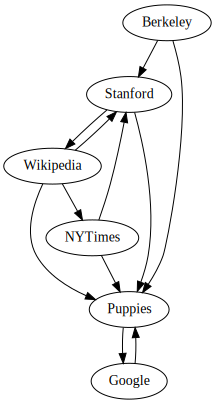

In [93]:
stanford = Node("Stanford")
wiki = Node("Wikipedia")
nytimes = Node("NYTimes")
cal = Node("Berkeley")
puppies = Node("Puppies")
google = Node("Google")

G = Graph()
V = [ stanford, wiki, nytimes, cal, puppies, google ]
for v in V:
    G.addVertex(v)
    
E = [ (stanford, wiki), (stanford, puppies), (wiki, stanford), (wiki, nytimes), (nytimes, stanford), (cal, stanford), (cal, puppies), (wiki,puppies), (nytimes, puppies), (puppies, google), (google, puppies) ]
for x,y in E:
    G.addDiEdge( x,y )

print(G)
visualiseGraph(G)

In [99]:
SCCs = SCC(G, False)
for X in SCCs:
    print ([str(x) for x in X])

['GoldCoast', 'PortDouglas']
['Brisbane', 'Darwin', 'Perth']
['Sydney', 'Cairns']
['Melbourne']


Play around with above SCC Code -- Try applying it on the Australian cities data we had before.

In [100]:
G = Graph()
for i in ['Melbourne', 'Sydney', 'Brisbane', 'Perth', 'Darwin', 'GoldCoast', 'PortDouglas', 'Cairns']:
    G.addVertex( Node(i) )

In [101]:
V = G.vertices

for i in range(len(V)):
    print(i, V[i].value)

0 Melbourne
1 Sydney
2 Brisbane
3 Perth
4 Darwin
5 GoldCoast
6 PortDouglas
7 Cairns


Graph with:
	 Vertices:
	Melbourne,Sydney,Brisbane,Perth,Darwin,GoldCoast,PortDouglas,Cairns,
	 Edges:
	(Melbourne,Sydney) (Melbourne,Brisbane) (Sydney,Cairns) (Brisbane,Darwin) (Brisbane,GoldCoast) (Perth,Darwin) (Darwin,Brisbane) (Darwin,Perth) (Darwin,PortDouglas) (GoldCoast,PortDouglas) (PortDouglas,GoldCoast) (Cairns,Melbourne) (Cairns,Sydney) 




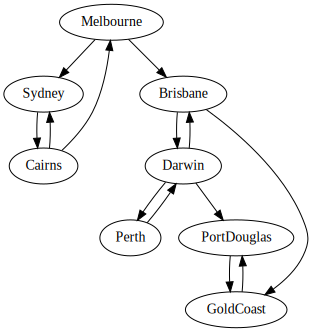

In [102]:
G.addDiEdge( V[0], V[1] ) #dot.edge('Melbourne', 'Sydney')
G.addDiEdge( V[0], V[2] ) #dot.edge('Melbourne', 'Brisbane')
G.addDiEdge( V[7], V[0] ) #dot.edge('Cairns', 'Melbourne')

# G.addDiEdge( V[1], V[3] ) #dot.edge('Sydney', 'Perth')
G.addBiEdge( V[1], V[7] ) #dot.edge('Sydney', 'Cairns')


G.addDiEdge( V[2], V[4] ) #dot.edge('Brisbane', 'Darwin')
G.addDiEdge( V[4], V[2] ) #dot.edge('Darwin', 'Brisbane')

G.addDiEdge( V[2], V[5] ) #dot.edge('Brisbane', 'GoldCoast')
G.addBiEdge( V[4], V[3] ) #dot.edge('Darwin', 'Perth')

G.addBiEdge( V[5], V[6] ) #dot.edge('GoldCoast', 'PortDouglas')

G.addDiEdge( V[4], V[6] ) #dot.edge('Darwin', 'PortDouglas')
print(G)
print()
visualiseGraph(G)

In [103]:
SCCs = SCC(G, False)
for X in SCCs:
    print ([str(x) for x in X])

['Melbourne', 'Cairns', 'Sydney']
['Brisbane', 'Darwin', 'Perth']
['PortDouglas', 'GoldCoast']


In [105]:
SCCs = SCC(G, True)
for X in SCCs:
    print ([str(x) for x in X])

Time 0 :	 entering Melbourne
Time 1 :	 entering Cairns
Time 2 :	 entering Sydney
Time 3 :	 leaving Sydney
Time 4 :	 leaving Cairns
Time 5 :	 leaving Melbourne
Time 7 :	 entering Brisbane
Time 8 :	 entering Darwin
Time 9 :	 entering Perth
Time 10 :	 leaving Perth
Time 11 :	 leaving Darwin
Time 12 :	 leaving Brisbane
Time 15 :	 entering GoldCoast
Time 16 :	 entering PortDouglas
Time 17 :	 leaving PortDouglas
Time 18 :	 leaving GoldCoast
Time 0 :	 entering GoldCoast
Time 1 :	 entering PortDouglas
Time 2 :	 leaving PortDouglas
Time 3 :	 leaving GoldCoast
Time 3 :	 entering Brisbane
Time 4 :	 entering Darwin
Time 5 :	 entering Perth
Time 6 :	 leaving Perth
Time 7 :	 leaving Darwin
Time 8 :	 leaving Brisbane
Time 8 :	 entering Melbourne
Time 9 :	 entering Sydney
Time 10 :	 entering Cairns
Time 11 :	 leaving Cairns
Time 12 :	 leaving Sydney
Time 13 :	 leaving Melbourne
['GoldCoast', 'PortDouglas']
['Brisbane', 'Darwin', 'Perth']
['Melbourne', 'Sydney', 'Cairns']


### <font color='red'> Activity 5 - Code Reflections. </font>

In [163]:
'''
Have run through the code to understand how it works:
Run a DFS from any node, and track the finish times.
Reverse the direction of all the edges.
Do a DFS again, but in the order of the initial DFS finish times.
The second DFS will return the forests in the graph, and return the SCC.
These are nodes that can each be reached in any direction, starting at any
node in the SCC Forest

In the above example, ['Melbourne', 'Cairns', 'Sydney'] are a SCC forest,
even though Cairns cannot be reached directlty from Melbourne.

Also, although PortDouglas can be reached from Brisbane directkly, or through
Darwin, there is no return flight so they are not SCC.

In a verbose running of the SCC it will show the routes that are connected,
within the "entering" and "leaving" pairs. Everytime an entering is encountered, after a leaving,
it denotes the beginning of the next SCC

'''









(5) Have a look at the associated ipython notebook and run the code for SCC. Demonstrate your understanding of the code by (doing some of the following activities):
Running the code with many different test-cases.
Alter the code and obtain some desired functionality.
Find errors in the code, or
Expand the code.

***